In [2]:
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#cleaning
df['Age']=df['Age'].fillna(df['Age'].mean())
df.dropna(subset=['Embarked'],inplace=True) #data = df[df["Embarked"].notnull()]
df=pd.get_dummies(df,columns=['Sex','Embarked'])
df=df.drop(columns=['Cabin'])
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,0,1,1,0,0


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Sex_female       uint8
Sex_male         uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

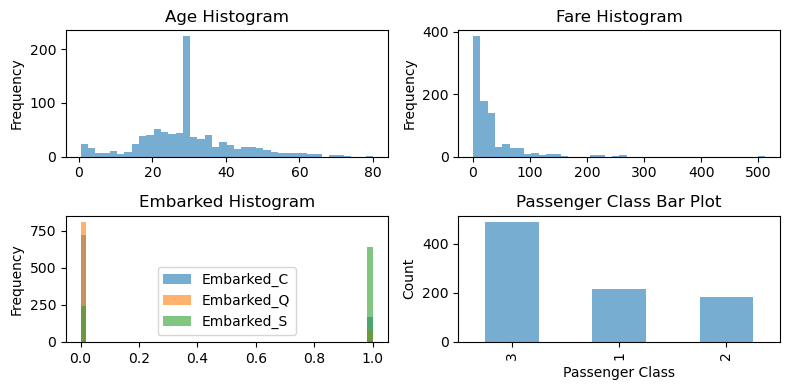

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 4))

df['Age'].plot.hist(ax=axes[0][0], bins=40,alpha=0.6)
df['Fare'].plot.hist(ax=axes[0][1], bins=40, alpha=0.6)
df[['Embarked_C', 'Embarked_Q','Embarked_S']].plot.hist(ax=axes[1][0],bins=50, alpha=0.6)
class_counts = df['Pclass'].value_counts()
# Create the bar plot
class_counts.plot.bar(ax=axes[1][1], alpha=0.6)
axes[0][0].set_title('Age Histogram')
axes[0][1].set_title('Fare Histogram')
axes[1][0].set_title('Embarked Histogram')
axes[1][1].set_title('Passenger Class Bar Plot')
axes[1][1].set_xlabel('Passenger Class')
axes[1][1].set_ylabel('Count')

plt.tight_layout()
plt.show()


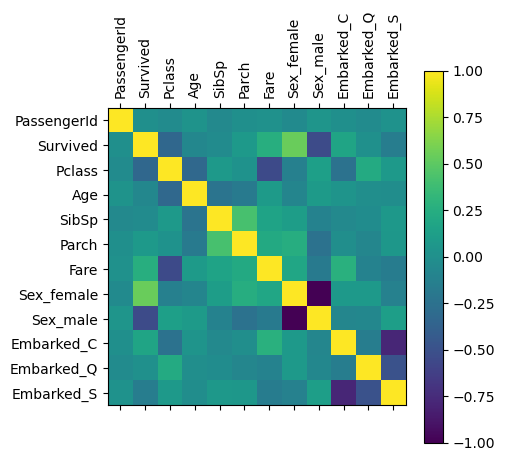

In [10]:
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.matshow(corr_matrix)

# Set x-axis and y-axis tick labels
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation='vertical')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.colorbar()  # Add a colorbar to the plot

plt.show()


In [11]:
# training
x= df[['Embarked_C', 'Embarked_Q','Embarked_S', 'Pclass', 'Age', 'SibSp', 'Sex_male', 'Sex_female']]
y=df['Survived']

In [12]:
x

,Embarked_C,Embarked_Q,Embarked_S,Pclass,Age,SibSp,Sex_male,Sex_female
0,0,0,1,3,22.000000,1,1,0
1,1,0,0,1,38.000000,1,0,1
2,0,0,1,3,26.000000,0,0,1
3,0,0,1,1,35.000000,1,0,1
4,0,0,1,3,35.000000,0,1,0
...,...,...,...,...,...,...,...,...
886,0,0,1,2,27.000000,0,1,0
887,0,0,1,1,19.000000,0,0,1
888,0,0,1,3,29.699118,1,0,1
889,1,0,0,1,26.000000,0,1,0


In [13]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [14]:
print(x.shape)
print(y.shape)

(889, 8)
(889,)


In [15]:
#from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, f1_score, roc_curve,auc
import matplotlib.pyplot as plt


In [16]:
x_tr,x_te,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_tr)
x_test=scaler.transform(x_te)

In [17]:
print("Training Data Shape: {}\nTraining labels Shape: {}\nTesting Data Shape: {}\nTesting labels Shape: {}"
      .format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Training Data Shape: (711, 8)
Training labels Shape: (711,)
Testing Data Shape: (178, 8)
Testing labels Shape: (178,)


In [18]:
mlp=MLPClassifier(hidden_layer_sizes=(100,100),activation='relu',learning_rate='constant', learning_rate_init=0.1,random_state=42)
mlp.fit(x_train,y_train)
y_pred=mlp.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8146067415730337


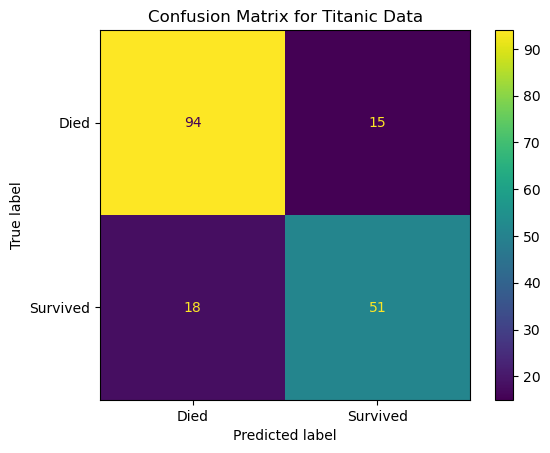

In [19]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])

# Plot the confusion matrix
disp.plot()

# Add a title and show the plot
plt.title("Confusion Matrix for Titanic Data")
plt.show()

In [20]:
y_test

281    0
435    1
39     1
418    0
585    1
      ..
433    0
807    0
25     1
85     1
10     1
Name: Survived, Length: 178, dtype: int64

In [21]:
# Calculate the classification report
report = classification_report(y_test, y_pred, target_names=['Died','Survived'])

# Print the report
print(report)

              precision    recall  f1-score   support

        Died       0.84      0.86      0.85       109
    Survived       0.77      0.74      0.76        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [22]:
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print(f1)

0.7555555555555555


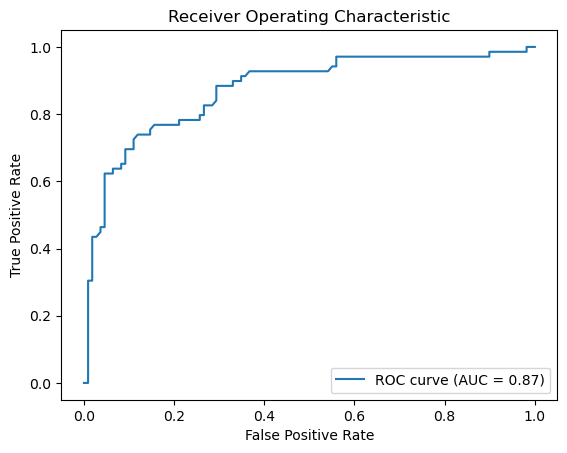

In [23]:
# Compute the probabilities of the positive class
y_prob = mlp.predict_proba(x_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [24]:
mlp2=MLPClassifier(hidden_layer_sizes=(100,100),activation='relu',solver='sgd',batch_size=16,learning_rate='constant',max_iter=500, learning_rate_init=0.001,random_state=42)
mlp2.fit(x_train,y_train)
y_pred2=mlp.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.8146067415730337


# Same thing but with pytorch

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

# Define the MLP model
class MLP1(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [59]:
# Define the hyperparameters
input_size = x_train.shape[1]
hidden_size = 100
output_size = 1
learning_rate = 0.1
epochs = 100

# Initialize the model
model = MLP1(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [60]:
# Convert the data to PyTorch tensors
x_train_tensor = torch.Tensor(x_train)
y_train_tensor = torch.Tensor(y_train)


In [61]:
x_train.shape

(711, 8)

In [62]:
x_train_tensor.shape

torch.Size([711, 8])

In [63]:
# Training loop
for epoch in range(epochs):
    # Forward pass
    outputs = model(x_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Compute accuracy and loss for training
    train_preds = torch.argmax(outputs, dim=1)
    train_acc = (train_preds == y_train_tensor).sum().item() / len(y_train_tensor)
    print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Training Accuracy: {train_acc:.4f}")

# Convert the test data to PyTorch tensor
x_test_tensor = torch.Tensor(x_test)


Epoch [1/100], Training Loss: 0.6877, Training Accuracy: 0.6188
Epoch [2/100], Training Loss: 0.6784, Training Accuracy: 0.6188
Epoch [3/100], Training Loss: 0.6698, Training Accuracy: 0.6188
Epoch [4/100], Training Loss: 0.6618, Training Accuracy: 0.6188
Epoch [5/100], Training Loss: 0.6543, Training Accuracy: 0.6188
Epoch [6/100], Training Loss: 0.6472, Training Accuracy: 0.6188
Epoch [7/100], Training Loss: 0.6404, Training Accuracy: 0.6188
Epoch [8/100], Training Loss: 0.6338, Training Accuracy: 0.6188
Epoch [9/100], Training Loss: 0.6273, Training Accuracy: 0.6188
Epoch [10/100], Training Loss: 0.6210, Training Accuracy: 0.6188
Epoch [11/100], Training Loss: 0.6148, Training Accuracy: 0.6188
Epoch [12/100], Training Loss: 0.6086, Training Accuracy: 0.6188
Epoch [13/100], Training Loss: 0.6025, Training Accuracy: 0.6188
Epoch [14/100], Training Loss: 0.5964, Training Accuracy: 0.6188
Epoch [15/100], Training Loss: 0.5904, Training Accuracy: 0.6188
Epoch [16/100], Training Loss: 0.5

In [64]:
# Evaluate the model on the test data
with torch.no_grad():
    outputs = model(x_test_tensor)
    predicted = (outputs.squeeze() > 0.5).float()  # Apply a threshold for binary classification

# Calculate the accuracy
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)

Accuracy: 0.8033707865168539


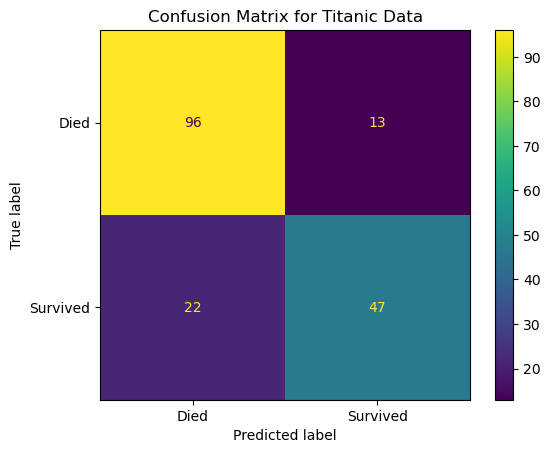

In [65]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, predicted)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])

# Plot the confusion matrix
disp.plot()

# Add a title and show the plot
plt.title("Confusion Matrix for Titanic Data")
plt.show()

In [66]:
# Calculate the classification report
report2 = classification_report(y_test, predicted, target_names=['Died','Survived'])

# Print the report
print(report2)

              precision    recall  f1-score   support

        Died       0.81      0.88      0.85       109
    Survived       0.78      0.68      0.73        69

    accuracy                           0.80       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178



In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8033707865168539
Precision: 0.7833333333333333
Recall: 0.6811594202898551
F1 Score: 0.7286821705426356


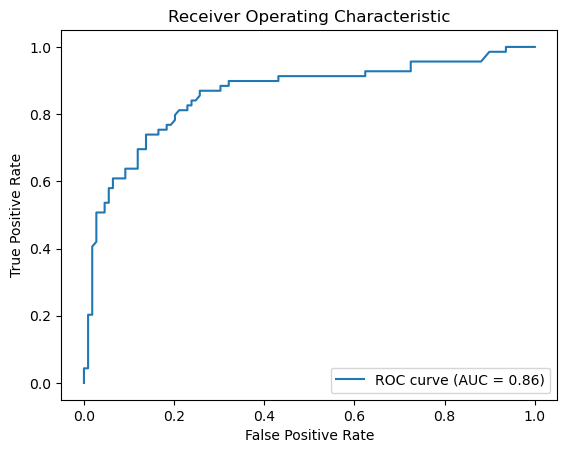

In [68]:
# Compute the probabilities of the positive class
y_prob = torch.sigmoid(outputs.squeeze()).detach().numpy()

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()